In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine_df = pd.read_csv("D:\\Assignments questions\\PCA\\PCA\\wine.csv")
wine_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# 1. Basic Data Exploration
print("Shape of dataset:", wine_df.shape)
print("\nColumns:\n", wine_df.columns)
print("\nData Types:\n", wine_df.dtypes)
print("\nMissing Values:\n", wine_df.isnull().sum())
print("\nFirst 5 Rows:\n", wine_df.head())


Shape of dataset: (178, 14)

Columns:
 Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

Data Types:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

Missing Values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

First 5 Rows:
    Type 

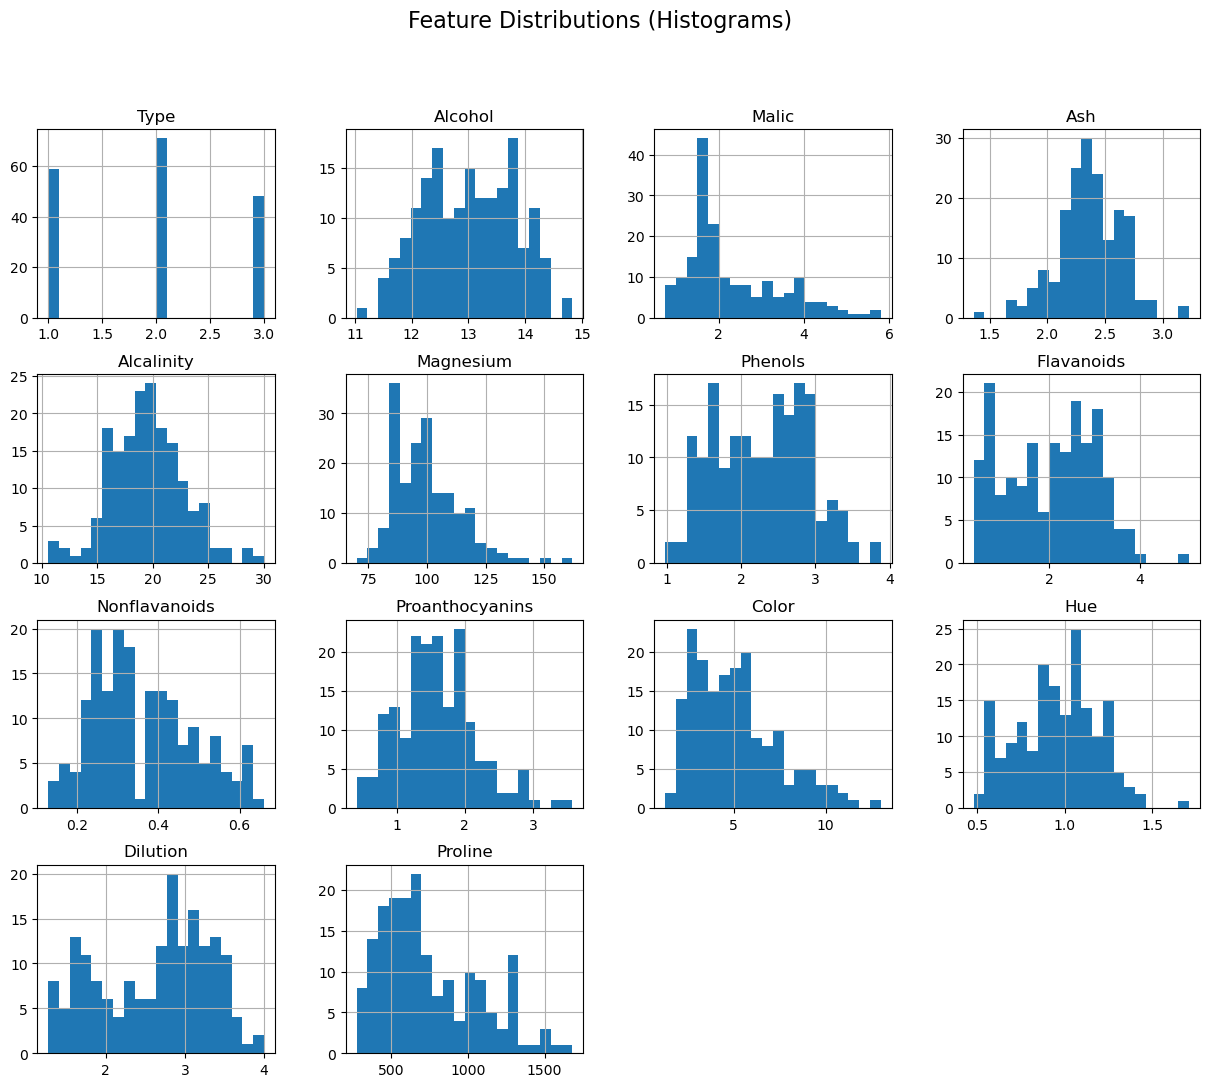

In [7]:
# 2. Distribution of Features
# Histograms
wine_df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

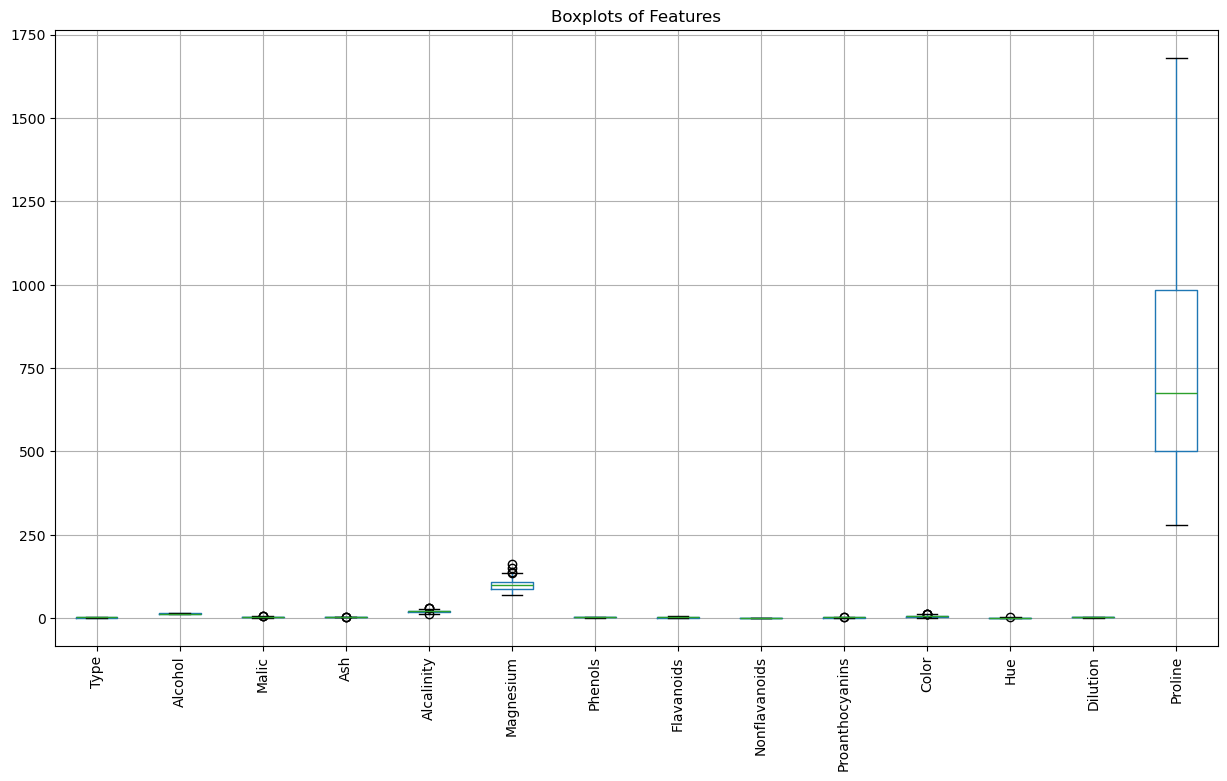

In [8]:
# Boxplots
plt.figure(figsize=(15, 8))
wine_df.boxplot()
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.show()

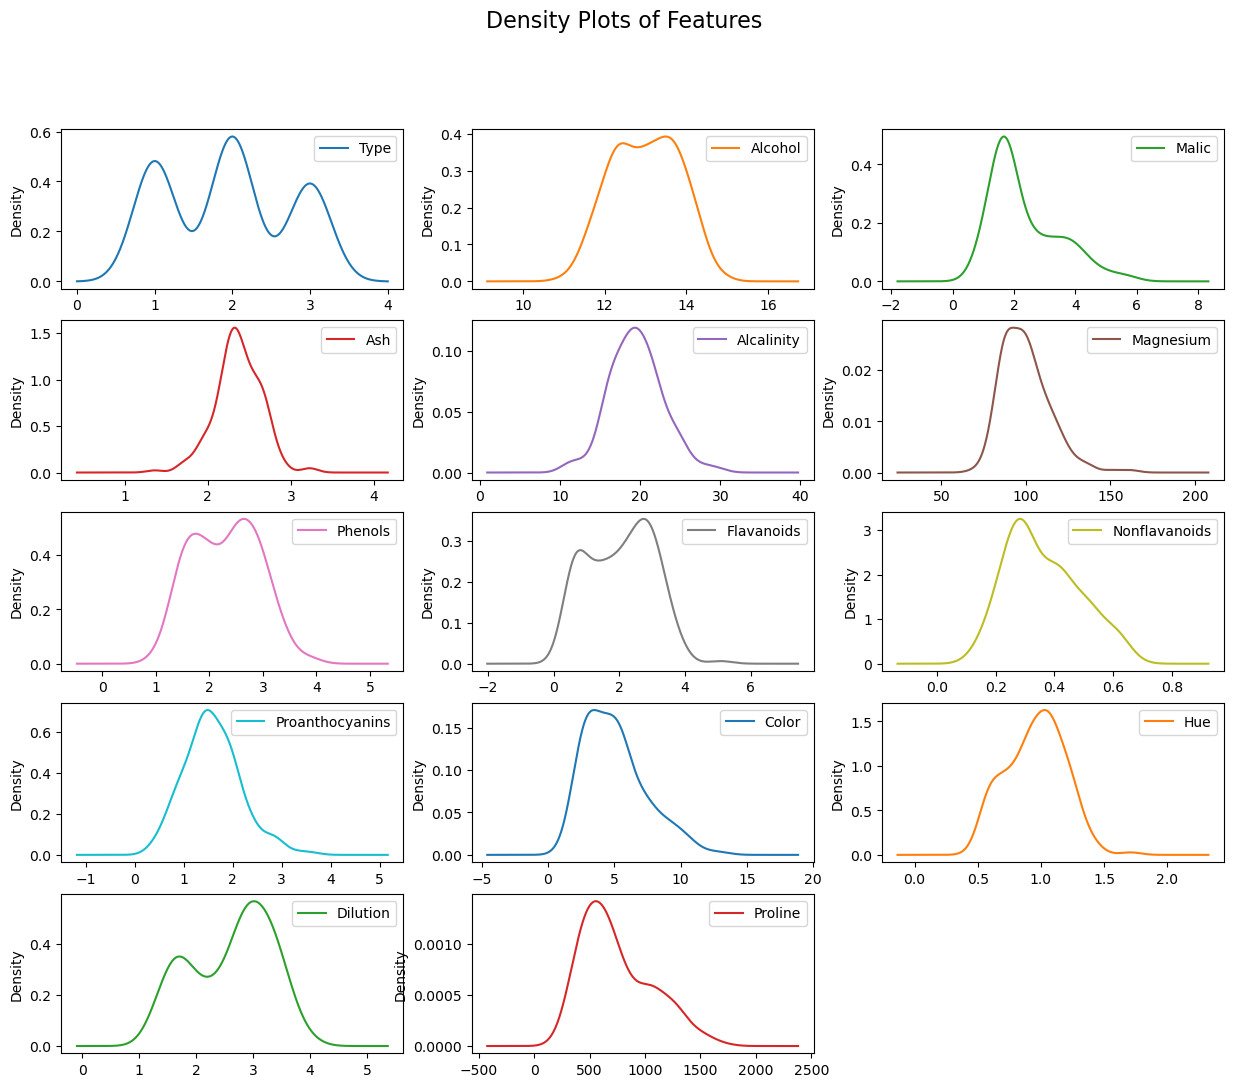

In [9]:
# Density plots
wine_df.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 12), sharex=False)
plt.suptitle("Density Plots of Features", fontsize=16)
plt.show()

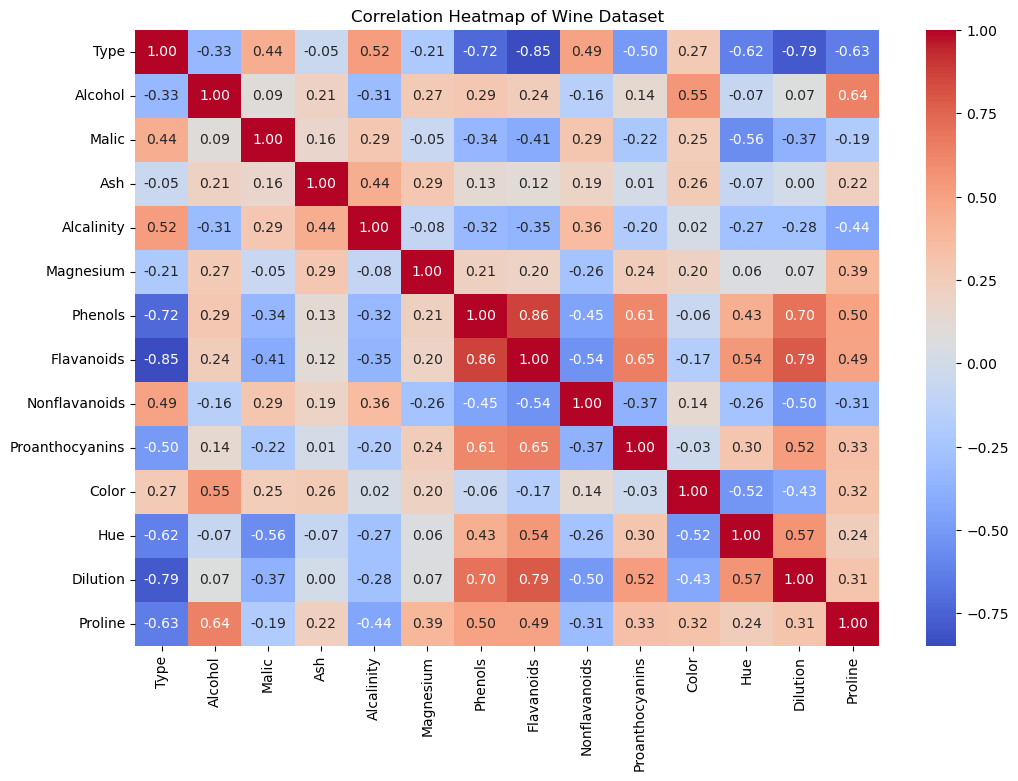

In [10]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = wine_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# -------------------------------
# 1. Standardize the Features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_df)


In [12]:
# -------------------------------
# 2. Apply PCA
# -------------------------------
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (how much variance each component explains)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

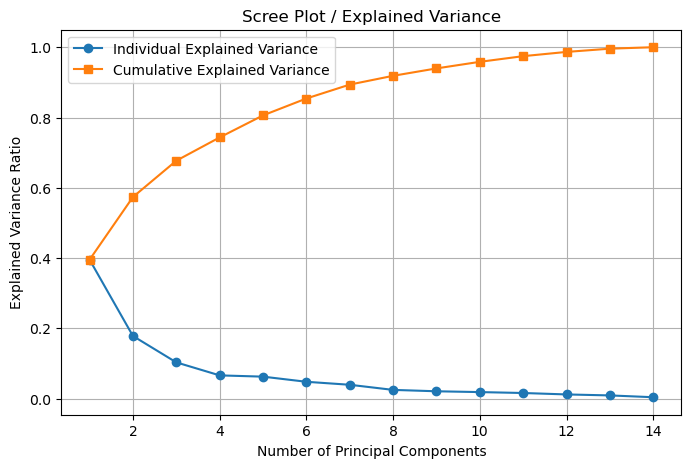

In [17]:
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label='Cumulative Explained Variance')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot / Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# -------------------------------
# 3. Transform Data into Principal Components
# -------------------------------
# (For example, keep first N components that explain ~95% variance)
n_components = (cumulative_variance < 0.95).sum() + 1
print(f"Optimal number of components to retain 95% variance: {n_components}")

pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

print("Shape of PCA transformed data:", X_pca_final.shape)

Optimal number of components to retain 95% variance: 10
Shape of PCA transformed data: (178, 10)


C:\Users\munig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


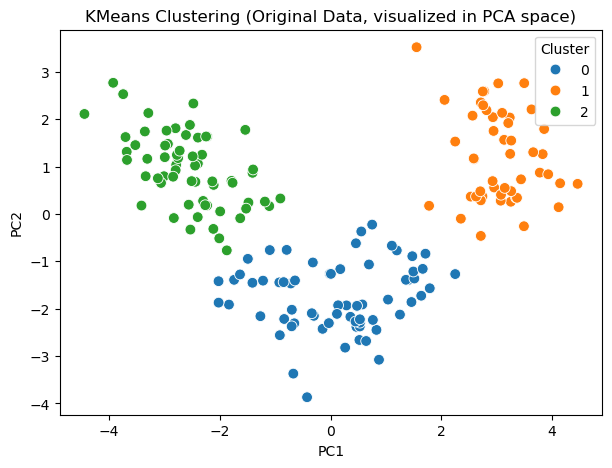

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
# --- 2. Apply KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 because wine dataset has 3 classes
labels = kmeans.fit_predict(X_scaled)

# --- 3. Visualization (PCA for 2D plotting) ---
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=60)
plt.title("KMeans Clustering (Original Data, visualized in PCA space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [22]:
# --- 4. Evaluation ---
sil_score = silhouette_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


In [26]:
X = wine_df.drop("Type", axis=1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Apply PCA (reduce dimensionality) ---
pca = PCA(n_components=0.95)   # keep enough PCs to explain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (178, 13)
Reduced shape: (178, 10)


C:\Users\munig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\munig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


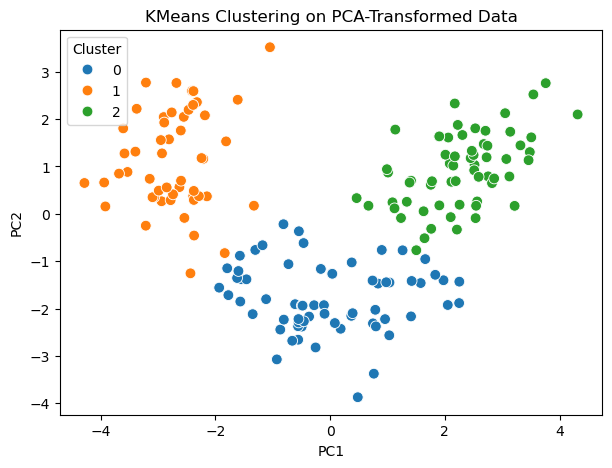

In [27]:
# --- 3. Apply KMeans on PCA data ---
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

# --- 4. Visualization (using first 2 PCA components) ---
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette="tab10", s=60)
plt.title("KMeans Clustering on PCA-Transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


In [28]:
# --- 5. Evaluation ---
sil_score_pca = silhouette_score(X_pca, labels_pca)
db_index_pca = davies_bouldin_score(X_pca, labels_pca)

print("Silhouette Score (PCA Data):", sil_score_pca)
print("Davies-Bouldin Index (PCA Data):", db_index_pca)

Silhouette Score (PCA Data): 0.2986748294369289
Davies-Bouldin Index (PCA Data): 1.3363263335155764


In [29]:
'''1.Clustering on the PCA-transformed data produced more compact and better-separated clusters compared to the original dataset.
  The original data preserved all features but showed slightly more overlap due to redundancy and noise.
2. Similarities/Differences: Both methods formed three clusters, but PCA gave clearer separation, while the original data showed more overlap.
3. Impact of Dimensionality Reduction: PCA reduced noise and redundancy, making clustering more stable and efficient.
4. Trade-offs: Original data keeps feature interpretability, while PCA improves performance but loses direct meaning of features.'''

'1.Clustering on the PCA-transformed data produced more compact and better-separated clusters compared to the original dataset.\n  The original data preserved all features but showed slightly more overlap due to redundancy and noise.\n2. Similarities/Differences: Both methods formed three clusters, but PCA gave clearer separation, while the original data showed more overlap.\n3. Impact of Dimensionality Reduction: PCA reduced noise and redundancy, making clustering more stable and efficient.\n4. Trade-offs: Original data keeps feature interpretability, while PCA improves performance but loses direct meaning of features.'